In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample = pd.read_csv('./sample_submit.csv')

In [2]:
train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)

In [3]:
#ラベルエンコーディング
term_mapping = {'3 years': 3, '5 years': 5}
loan_status_mapping = {'ChargedOff': 1, 'FullyPaid': 0}
application_type_mapping = {'Joint App': 1, 'Individual': 0}

train['term'] = train['term'].map(term_mapping)
train['loan_status'] = train['loan_status'].map(loan_status_mapping)
train['application_type'] = train['application_type'].map(application_type_mapping)

In [4]:
train.head()

,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,1800.0,3,14.49,C4,NaN,debt_consolidation,665.0,0,0
1,1200.0,5,16.29,C4,2 years,debt_consolidation,700.0,0,1
2,2000.0,5,21.98,E4,10 years,home_improvement,670.0,0,0
3,1000.0,3,8.59,A5,4 years,debt_consolidation,710.0,0,0
4,1500.0,3,13.99,C1,4 years,debt_consolidation,680.0,0,0


In [5]:
test['term'] = test['term'].map(term_mapping)
test['application_type'] = test['application_type'].map(application_type_mapping)

In [6]:
test.head()

,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,1912.5,3,10.16,B1,5 years,debt_consolidation,725.0,0
1,1800.0,3,8.99,B1,9 years,credit_card,695.0,0
2,550.0,3,14.65,C2,10 years,credit_card,660.0,0
3,2000.0,5,15.59,C5,10 years,credit_card,695.0,0
4,1500.0,5,12.79,C1,0 years,medical,720.0,0


In [7]:
print('train : ', train['employment_length'].isnull().sum())
print('test : ', test['employment_length'].isnull().sum())

train :  13185
test :  1440


In [8]:
#train.fillna({'employment_length': '10 years'}) 
#train.head()

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242156 entries, 0 to 242155
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   loan_amnt          242156 non-null  float64
 1   term               242156 non-null  int64  
 2   interest_rate      242156 non-null  float64
 3   grade              242156 non-null  object 
 4   employment_length  228971 non-null  object 
 5   purpose            242156 non-null  object 
 6   credit_score       242156 non-null  float64
 7   application_type   242156 non-null  int64  
 8   loan_status        242156 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 16.6+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26906 entries, 0 to 26905
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_amnt          26906 non-null  float64
 1   term               26906 non-null  int64  
 2   interest_rate      26906 non-null  float64
 3   grade              26906 non-null  object 
 4   employment_length  25466 non-null  object 
 5   purpose            26906 non-null  object 
 6   credit_score       26906 non-null  float64
 7   application_type   26906 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 1.6+ MB


重複部分の確認

In [11]:
print('train: ', train.duplicated().sum())
print('test: ', test.duplicated().sum())

train:  21772
test:  531


In [12]:
train_dup = train[train.duplicated()]
train_dup

,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
912,1200.0,3,14.33,C1,10 years,debt_consolidation,670.0,0,0
1408,1000.0,3,13.99,C3,10 years,debt_consolidation,660.0,0,1
1780,3000.0,3,15.31,C2,2 years,debt_consolidation,665.0,0,0
2226,1400.0,3,10.16,B1,10 years,debt_consolidation,730.0,0,0
2267,100.0,3,11.49,B5,10 years,other,690.0,0,0
...,...,...,...,...,...,...,...,...,...
242131,1000.0,3,13.99,C3,10 years,credit_card,720.0,0,0
242137,900.0,3,13.99,C3,10 years,debt_consolidation,675.0,0,0
242144,1200.0,3,12.79,C1,10 years,debt_consolidation,670.0,0,1
242148,2000.0,3,8.90,A5,4 years,debt_consolidation,695.0,0,0


In [13]:
#重複部分の削除
train.drop_duplicates(inplace=True)

#重複部分の削除の後に新しいインデックスを取得。
train.reset_index(drop=True, inplace=True)

#データの確認
train

,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,1800.0,3,14.49,C4,NaN,debt_consolidation,665.0,0,0
1,1200.0,5,16.29,C4,2 years,debt_consolidation,700.0,0,1
2,2000.0,5,21.98,E4,10 years,home_improvement,670.0,0,0
3,1000.0,3,8.59,A5,4 years,debt_consolidation,710.0,0,0
4,1500.0,3,13.99,C1,4 years,debt_consolidation,680.0,0,0
...,...,...,...,...,...,...,...,...,...
220379,3500.0,3,27.49,F4,0 years,debt_consolidation,680.0,0,1
220380,1930.0,3,12.74,C1,10 years,other,695.0,0,1
220381,780.0,3,14.08,C3,10 years,debt_consolidation,730.0,0,0
220382,472.5,3,19.72,D5,NaN,home_improvement,685.0,0,0


In [14]:
counts_term_train = train["term"].value_counts()
print(counts_term_train)

3    169533
5     50851
Name: term, dtype: int64


In [15]:
counts_grade_train = train["grade"].value_counts()
print(counts_grade_train)

C1    14931
B4    14611
B3    14485
B5    13559
B2    12963
C2    12924
C4    12660
B1    11930
C5    11861
C3    11835
D1     8411
A5     8350
D2     8213
A4     7241
D3     6846
D4     6349
A3     5824
D5     5427
A1     5337
A2     5335
E1     3416
E2     2954
E3     2914
E4     2611
E5     2231
F1     1701
F2     1310
F3     1112
F4      830
F5      775
G1      585
G2      321
G3      226
G4      187
G5      119
Name: grade, dtype: int64


In [16]:
counts_employment_length_train = train["employment_length"].value_counts()
print(counts_employment_length_train)

10 years    65938
2 years     20479
3 years     17677
0 years     17543
5 years     15918
1 year      15087
4 years     14136
6 years     12456
7 years     10174
8 years      9512
9 years      8653
Name: employment_length, dtype: int64


In [17]:
counts_purpose_train = train["purpose"].value_counts()
print(counts_purpose_train)

debt_consolidation    123568
credit_card            44901
home_improvement       15655
other                  15125
major_purchase          5702
small_business          3289
car                     2879
medical                 2814
moving                  1784
house                   1734
vacation                1705
wedding                 1020
renewable_energy         208
Name: purpose, dtype: int64


In [18]:
counts_application_type_train = train["application_type"].value_counts()
print(counts_application_type_train)

0    214346
1      6038
Name: application_type, dtype: int64


In [19]:
counts_loan_status_train = train["loan_status"].value_counts()
print(counts_loan_status_train)

0    173774
1     46610
Name: loan_status, dtype: int64


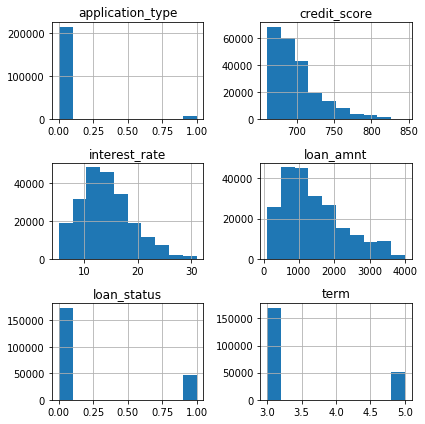

In [20]:
train.hist(figsize=(6, 6))
plt.tight_layout()
plt.show();

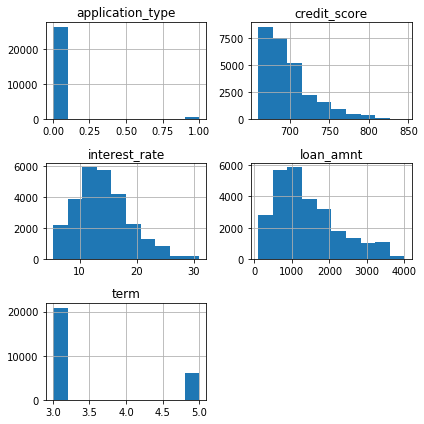

In [21]:
test.hist(figsize=(6, 6))
plt.tight_layout()
plt.show();

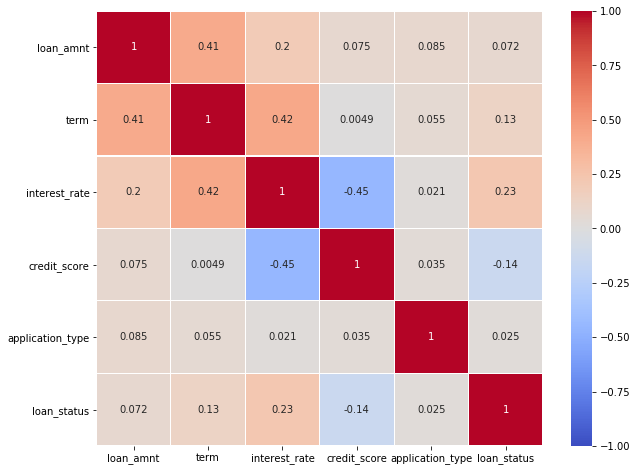

In [22]:
# heatmapの表示
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), vmin=-1.0, vmax=1.0, annot=True, cmap='coolwarm', linewidths=0.1)
plt.show()

前処理用にデータを分割

In [23]:
train.head()

,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type,loan_status
0,1800.0,3,14.49,C4,NaN,debt_consolidation,665.0,0,0
1,1200.0,5,16.29,C4,2 years,debt_consolidation,700.0,0,1
2,2000.0,5,21.98,E4,10 years,home_improvement,670.0,0,0
3,1000.0,3,8.59,A5,4 years,debt_consolidation,710.0,0,0
4,1500.0,3,13.99,C1,4 years,debt_consolidation,680.0,0,0


In [24]:
test.head()

,loan_amnt,term,interest_rate,grade,employment_length,purpose,credit_score,application_type
0,1912.5,3,10.16,B1,5 years,debt_consolidation,725.0,0
1,1800.0,3,8.99,B1,9 years,credit_card,695.0,0
2,550.0,3,14.65,C2,10 years,credit_card,660.0,0
3,2000.0,5,15.59,C5,10 years,credit_card,695.0,0
4,1500.0,5,12.79,C1,0 years,medical,720.0,0


In [25]:
from sklearn.ensemble import RandomForestRegressor as RFR
#学習データの作成　→　Object列と不要な列を落とす
trainX=train.drop(['loan_status'], axis=1)
trainX=pd.get_dummies(trainX)
trainY=train.loan_status
#学習実行
model=RFR(n_estimators=100)
model.fit(trainX,trainY)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

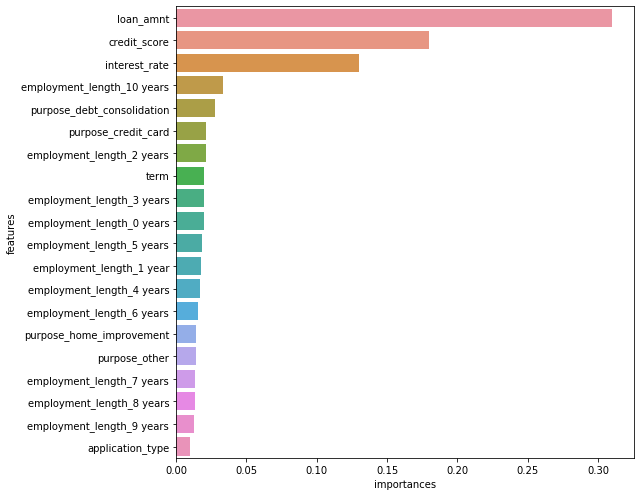

In [26]:
fi = model.feature_importances_
importances = pd.DataFrame({"features":trainX.columns.values, "importances" : fi})
plt.figure(figsize=(9, 7))
sns.barplot(x="importances", y="features", data=importances.sort_values(by="importances", ascending=False)[:20])
plt.tight_layout()

In [27]:
target_cols=['loan_amnt',
             'credit_score',
             'interest_rate',
             'employment_length_10 years',
             'purpose_debt_consolidation',
             'purpose_credit_card',
             'employment_length_2 years',
             'term',
             'employment_length_3 years',
             'employment_length_0 years',
             'employment_length_5 years',
             'employment_length_1 year',
             'employment_length_4 years',
             'employment_length_6 years',
             'purpose_home_improvement',
             'purpose_other',
             'employment_length_7 years',
             'employment_length_8 years',
             'employment_length_9 years',
             'application_type']
trainX=trainX[target_cols]

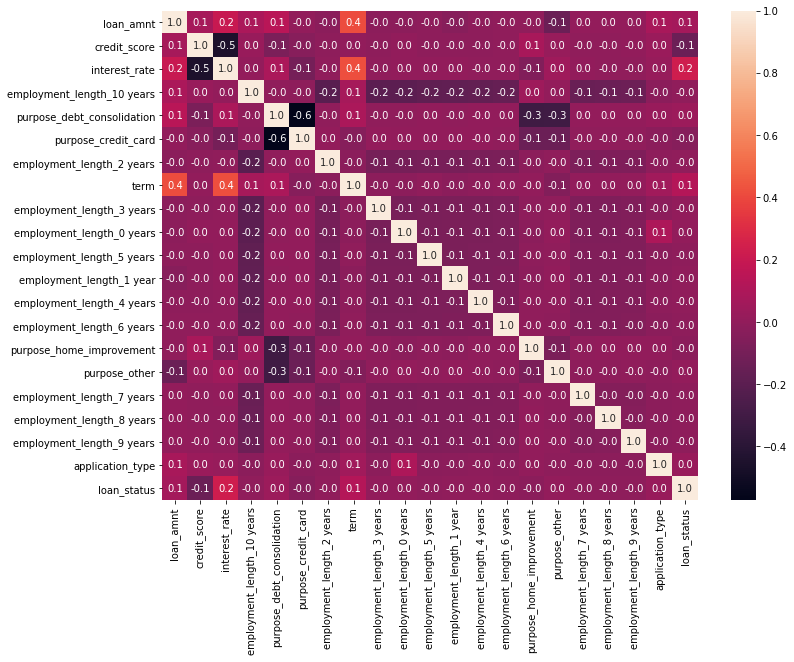

In [28]:
fig, ax = plt.subplots(figsize=(12, 9)) 
check=trainX.copy()
check['loan_status']=trainY
sns.heatmap(check.corr(), annot=True, fmt='.1f')

In [29]:
trainX.head()

,loan_amnt,credit_score,interest_rate,employment_length_10 years,purpose_debt_consolidation,purpose_credit_card,employment_length_2 years,term,employment_length_3 years,employment_length_0 years,employment_length_5 years,employment_length_1 year,employment_length_4 years,employment_length_6 years,purpose_home_improvement,purpose_other,employment_length_7 years,employment_length_8 years,employment_length_9 years,application_type
0,1800.0,665.0,14.49,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
1,1200.0,700.0,16.29,0,1,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0
2,2000.0,670.0,21.98,1,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0
3,1000.0,710.0,8.59,0,1,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0
4,1500.0,680.0,13.99,0,1,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0


In [30]:
test = pd.get_dummies(test)
testX = test[target_cols]
testX

,loan_amnt,credit_score,interest_rate,employment_length_10 years,purpose_debt_consolidation,purpose_credit_card,employment_length_2 years,term,employment_length_3 years,employment_length_0 years,employment_length_5 years,employment_length_1 year,employment_length_4 years,employment_length_6 years,purpose_home_improvement,purpose_other,employment_length_7 years,employment_length_8 years,employment_length_9 years,application_type
0,1912.5,725.0,10.16,0,1,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0
1,1800.0,695.0,8.99,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,1,0
2,550.0,660.0,14.65,1,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0
3,2000.0,695.0,15.59,1,0,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0
4,1500.0,720.0,12.79,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26901,800.0,735.0,7.90,0,1,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0
26902,750.0,715.0,7.49,0,1,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0
26903,840.0,695.0,15.05,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0
26904,1000.0,680.0,14.27,0,1,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0


In [31]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(trainX, trainY)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [35]:
pred = model.predict(testX)
pred = pd.DataFrame(pred)
pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
26901,0
26902,0
26903,0
26904,0


In [41]:
sample

,id,loan_status
0,1496754,0
1,84909594,0
2,1165403,0
3,91354446,0
4,85636932,0
...,...,...
26901,5064630,0
26902,94416733,0
26903,120604638,0
26904,1110314,0


In [42]:
sample['loan_status'] = pred
sample

,id,loan_status
0,1496754,0
1,84909594,0
2,1165403,0
3,91354446,0
4,85636932,0
...,...,...
26901,5064630,0
26902,94416733,0
26903,120604638,0
26904,1110314,0


In [43]:
sample.to_csv('submit.csv', index=None, header=None)